# German Job Market Correlation and Regression Analysis.part1 

#### 1.1 Imoprting Libraries
#### 1.2 Importing Dataset
#### 2. Data prep for regression analysis
#### 3. Regression analysis with extreme values
#### 3.1 Regression Number of Openings vs. Demand Index
#### 3.2 Regression Number of Openings vs. Competitivness Score
#### 3.3 Regression Salary Median vs. Number of Openings
#### 4. Removing Extreme Values of the quantitative variables
#### 5. Data prep for regression analysis without extreme values


## 1. Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
%matplotlib inline

In [3]:
Jobmarket02= pd.read_excel(
    r'C:\Users\analy\Documents\German 2025 Job Market Analysis\02 Data\Original\Job Market Germany data set2.xlsx'
)


In [4]:
Jobmarket02.head()

,Unnamed: 0,year,month,job_title,industry,experience_level,salary_min_eur,salary_max_eur,salary_median_eur,number_of_openings,...,is_high_demand,openings_level,experience_numeric,remote_flag,metro_city,cost_region,city_salary_adjusted_index,job_market_pressure,competitiveness_score,seasonal_hiring_score
0,0,2025,11,Data Scientist,IT,Entry,45635,63497,54566,25,...,1,High,1,0,1,High,70935.8,0.384615,42.630769,4
1,1,2025,5,Nurse,Healthcare,Senior,63910,96906,80408,7,...,1,Medium,3,1,1,High,104530.4,0.102941,62.994118,2
2,2,2025,12,Data Scientist,IT,Entry,31803,57265,44534,7,...,0,Medium,1,0,0,Low,40080.6,0.218750,23.162500,1
3,3,2025,9,Data Scientist,IT,Mid,44566,97954,71260,17,...,1,Medium,2,1,0,Low,64134.0,0.232877,60.734247,4
4,4,2025,1,Software Engineer,IT,Senior,93762,207782,150772,3,...,1,Low,3,0,1,High,196003.6,0.046875,52.706250,1


## 2. Data prep for regression analysis


#### Number of Openings vs. demand index 

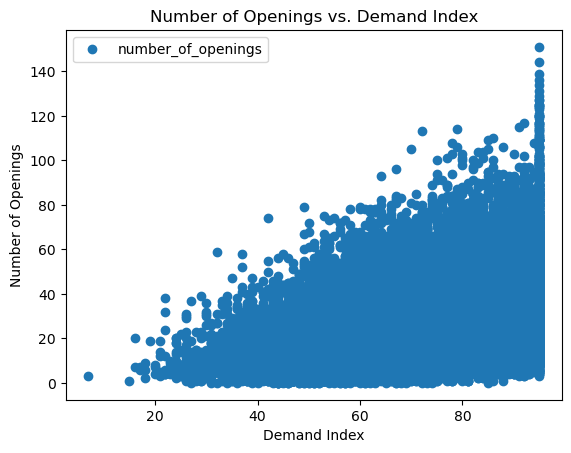

In [67]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Salary median vs. demand_index
ax = Jobmarket02.plot(x='demand_index', y='number_of_openings', style='o')  # The style option creates a scatterplot; without it, we only have lines.

# Use the matplotlib methods on the pyplot module, not on the DataFrame
plt.title('Number of Openings vs. Demand Index')  
plt.xlabel('Demand Index')  
plt.ylabel('Number of Openings')  
plt.show()

In [68]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = Jobmarket02['demand_index'].values.reshape(-1,1)
y = Jobmarket02['number_of_openings'].values.reshape(-1,1)

In [69]:
X

array([[64],
       [67],
       [31],
       ...,
       [95],
       [95],
       [67]], shape=(30000, 1))

In [70]:
y

array([[25],
       [ 7],
       [ 7],
       ...,
       [52],
       [40],
       [42]], shape=(30000, 1))

In [71]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Number of Openings vs. Competetivness Score

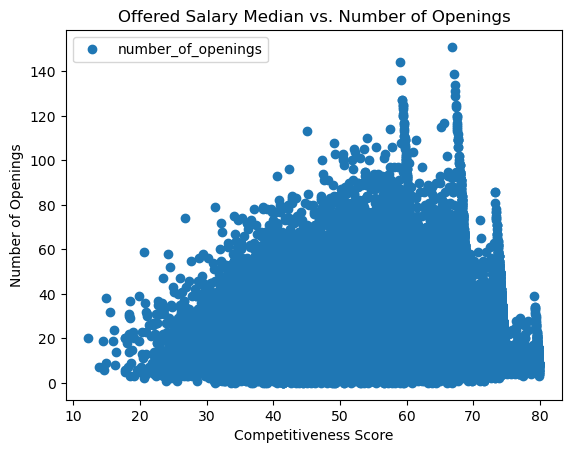

In [72]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Number of Openings vs. competetivness score
ax = Jobmarket02.plot(x='competitiveness_score', y='number_of_openings', style='o')  # The style option creates a scatterplot; without it, we only have lines.

# Use the matplotlib methods on the pyplot module, not on the DataFrame
plt.title('Offered Salary Median vs. Number of Openings')  
plt.xlabel('Competitiveness Score')  
plt.ylabel('Number of Openings')  
plt.show()

In [73]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = Jobmarket02['competitiveness_score'].values.reshape(-1,1)
y2 = Jobmarket02['number_of_openings'].values.reshape(-1,1)

In [74]:
X2

array([[42.63076923],
       [62.99411765],
       [23.1625    ],
       ...,
       [65.91666667],
       [61.16666667],
       [48.96470588]], shape=(30000, 1))

In [75]:
y2

array([[25],
       [ 7],
       [ 7],
       ...,
       [52],
       [40],
       [42]], shape=(30000, 1))

In [76]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#### Median Salary vs. Number of Openings

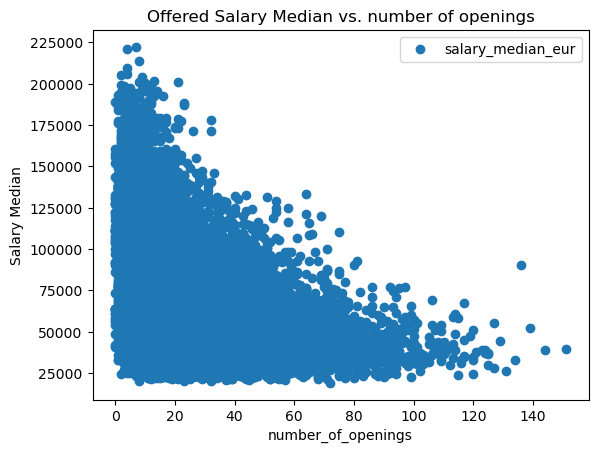

In [99]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Number of openings vs. Median Salary
ax3 = Jobmarket02.plot(x='number_of_openings', y='salary_median_eur', style='o')  # The style option creates a scatterplot; without it, we only have lines.

# Use the matplotlib methods on the pyplot module, not on the DataFrame
plt.title('Offered Salary Median vs. number of openings')  
plt.xlabel('number_of_openings')  
plt.ylabel('Salary Median')  
plt.show()

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X3 = Jobmarket02['number_of_openings'].values.reshape(-1,1)
y3 = Jobmarket02['salary_median_eur'].values.reshape(-1,1)

In [53]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

## 3. Regression Analysis

#### 3.1 Regression Number of Openings vs. Demand Index

In [77]:
# Create a regression object.

regression1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [78]:
# Fit the regression object onto the training set.

regression1.fit(X_train, y_train)

LinearRegression()

In [79]:
# Predict the values of y using X.

y_predicted = regression1.predict(X_test)

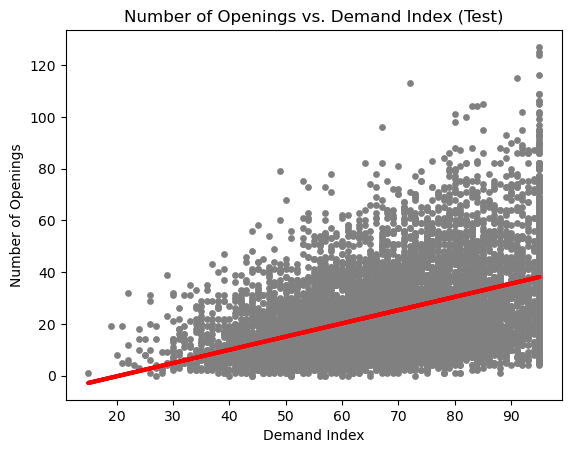

In [80]:
# Create a plot that shows the regression line from the model on the test set.
plot_test1 = plt
plot_test1.scatter(X_test, y_test, color='gray', s = 15)
plot_test1.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test1.title('Number of Openings vs. Demand Index (Test)')
plot_test1.xlabel('Demand Index')
plot_test1.ylabel('Number of Openings')

# Save plot 
plot_test1.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\openings vs. DemandIndex.TestModel.png')
plot_test1.show()

In [81]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.51161555]]
Mean squared error:  234.3196240997967
R2 score:  0.17639660544253455


In [83]:
y_predicted

array([[22.22468965],
       [26.82922956],
       [27.3408451 ],
       ...,
       [25.80599847],
       [22.73630519],
       [30.41053838]], shape=(9000, 1))

3.1 Regression Number of Openings vs. Demand Index

Slope: [[0.51161555]]
Mean squared error:  234.3196240997967
R2 score:  0.17639660544253455

Positive but vey small Slop means positive but weak relationship. For every 1 unit increase in the independent variable, the dependent variable increases by about 0.5 units. R²0.018  means that only 1.8% explains the number of openings by the demand index. must be other factors.


#### 3.2 Regression Number of Openings vs. Competitivness Score

In [84]:
# Create a regression object.

regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [85]:
# Fit the regression object onto the training set.

regression2.fit(X2_train, y2_train)

LinearRegression()

In [86]:
# Predict the values of y using X.

y2_predicted = regression2.predict(X2_test)

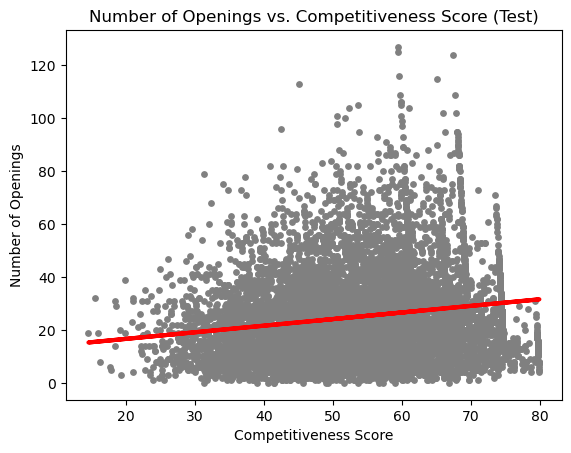

In [87]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2= plt
plot_test2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Number of Openings vs. Competitiveness Score (Test)')
plot_test2.xlabel('Competitiveness Score')
plot_test2.ylabel('Number of Openings')

# Save plot 
plot_test2.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\openings vs. CompetetivnessScore.TestModel.png')
plot_test2.show()
plot_test2.show()

In [88]:
# Create objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [89]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[0.2492758]]
Mean squared error:  279.27754676432784
R2 score:  0.01837527939691974


In [90]:
y2_predicted

array([[23.60096372],
       [26.81656977],
       [27.09593833],
       ...,
       [25.38147475],
       [22.3778272 ],
       [27.32305629]], shape=(9000, 1))

 3.2 Regression Number of Openings vs. Competitivness Score
Slope: [[0.2492758]]
Mean squared error:  279.27754676432784
R2 score:  0.01837527939691974

Positive but vey small Slop means positive but weak relationship. For every 1 unit increase in the independent variable, the dependent variable increases by about 0.25 units. R²0.018  means that only 1.8% explains the number of openings by the competitive score. must be other factors.

#### 3.3 Regression Salary Median vs. Number of Openings

In [54]:
# Create a regression object.

regression3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

regression3.fit(X3_train, y3_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y3_predicted = regression3.predict(X3_test)

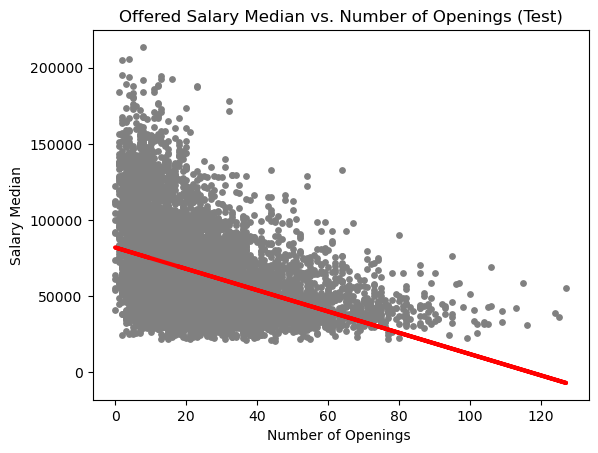

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test3= plt
plot_test3.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test3.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test3.title('Offered Salary Median vs. Number of Openings (Test)')
plot_test3.xlabel('Number of Openings ')
plot_test3.ylabel('Salary Median')

# Save plot 
plot_test3.savefig(r'C:\Users\analy\Documents\German 2025 Job Market Analysis\04 Analysis\salary vs. Openings.TestModel.png')
plot_test3.show()
plot_test3.show()

In [65]:
# Create objects that contain the model summary statistics.

rmse3 = mean_squared_error(y3_test, y3_predicted) # This is the mean squared error
r2_3 = r2_score(y3_test, y3_predicted) # This is the R2 score. 

In [66]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[-700.11205312]]
Mean squared error:  721040217.3694043
R2 score:  0.1638942451037001


In [61]:
y3_predicted

array([[41834.89648517],
       [55522.35471258],
       [43138.4639354 ],
       ...,
       [44442.03138563],
       [52915.21981212],
       [35968.84295913]], shape=(9000, 1))

3.3 Regression Salary Median vs. Number of Openings

Slope: [[-700.11205312]]
Mean squared error:  721040217.3694043
R2 score:  0.1638942451037001

The slop is negative suggesting a reverse relationship. -700.11 For every additional job opening, the model predicts that the median salary decreases by about €700. This suggests that when there are more positions available, salaries tend to be lower. R² Score: 0.164 (16.4%) The number of openings explains only about 16% of the variation in salaries ie, not strong correlation. Most of the variation is due to other factors.

## 4. Removing extreme values

In [11]:
Jobmarket02[['salary_median_eur','number_of_openings','demand_index','competitiveness_score']].describe()

,salary_median_eur,number_of_openings,demand_index,competitiveness_score
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,64781.443333,24.701067,69.113033,52.914817
std,29569.067238,17.446852,15.424580,11.219218
min,19196.000000,0.000000,7.000000,12.247059
25%,41381.500000,12.000000,58.000000,45.022571
50%,58617.500000,21.000000,69.000000,52.843836
75%,80441.750000,33.000000,81.000000,60.937500
max,222338.000000,151.000000,95.000000,79.937500


many values lay above the 75 percintile considered as extreme values in the salary mediana dn number of openinigs.

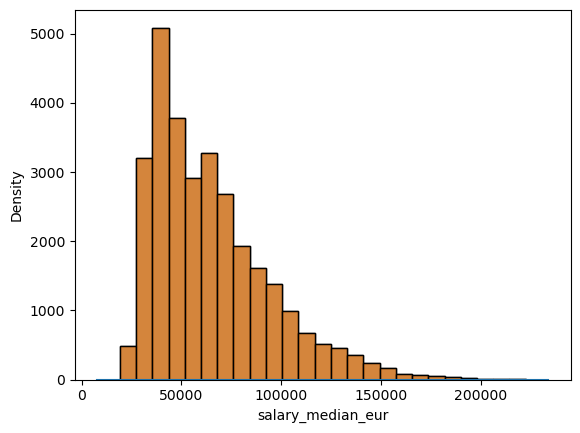

In [15]:
# ploting historgam to see extreme values
sns.histplot(Jobmarket02['salary_median_eur'], bins=25)
plt.show()


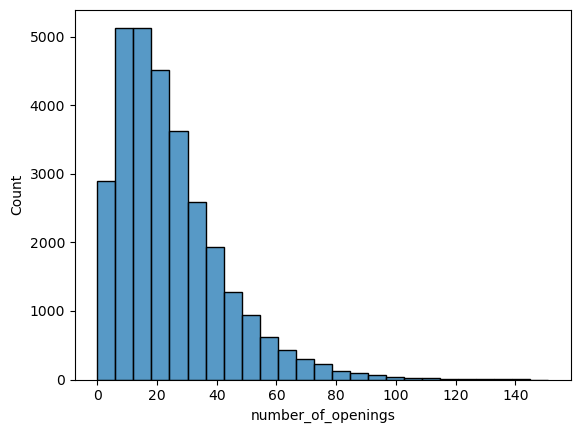

In [91]:
# ploting historgam to see extreme values
sns.histplot(Jobmarket02['number_of_openings'], bins=25)
plt.show()


#### Capping the data with extreme values to 95th percentile

In [94]:
# Calculate the 95th percentile for each column
salary_cap = Jobmarket02['salary_median_eur'].quantile(0.95)
openings_cap = Jobmarket02['number_of_openings'].quantile(0.95)

# Apply capping (values above the 95th percentile are set to the cap)
Jobmarket02['salary_median_eur_capped'] = Jobmarket02['salary_median_eur'].clip(upper=salary_cap)
Jobmarket02['number_of_openings_capped'] = Jobmarket02['number_of_openings'].clip(upper=openings_cap)

# Check results
print("95th percentile salary cap:", salary_cap)
print("95th percentile openings cap:", openings_cap)

95th percentile salary cap: 124349.2
95th percentile openings cap: 59.0


In [96]:
Jobmarket02[['salary_median_eur', 'salary_median_eur_capped', 'number_of_openings', 'number_of_openings_capped','demand_index','competitiveness_score']].describe()

,salary_median_eur,salary_median_eur_capped,number_of_openings,number_of_openings_capped,demand_index,competitiveness_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,64781.443333,63799.984167,24.701067,23.974900,69.113033,52.914817
std,29569.067238,26875.704123,17.446852,15.298523,15.424580,11.219218
min,19196.000000,19196.000000,0.000000,0.000000,7.000000,12.247059
25%,41381.500000,41381.500000,12.000000,12.000000,58.000000,45.022571
50%,58617.500000,58617.500000,21.000000,21.000000,69.000000,52.843836
75%,80441.750000,80441.750000,33.000000,33.000000,81.000000,60.937500
max,222338.000000,124349.200000,151.000000,59.000000,95.000000,79.937500


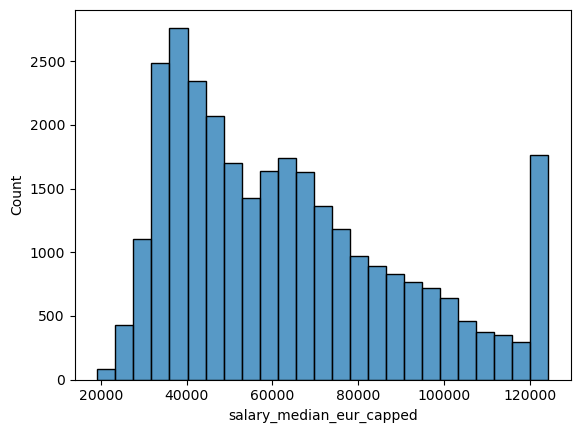

In [97]:
# ploting historgam to see extreme values
sns.histplot(Jobmarket02['salary_median_eur_capped'], bins=25)
plt.show()


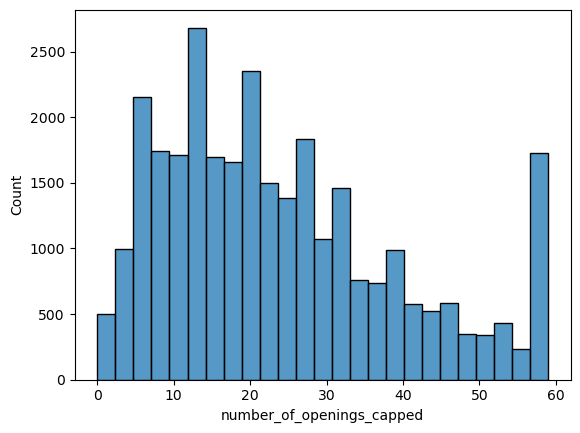

In [98]:
# ploting historgam to see extreme values
sns.histplot(Jobmarket02['number_of_openings_capped'], bins=25)
plt.show()


## 5. Preparing for Regression after capping the data to the 95th percintile

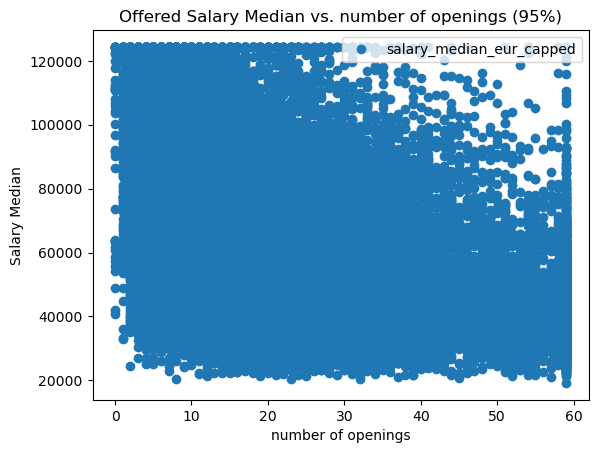

In [100]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Number of openings vs. Median Salary
ax3 = Jobmarket02.plot(x='number_of_openings_capped', y='salary_median_eur_capped', style='o')  # The style option creates a scatterplot; without it, we only have lines.

# Use the matplotlib methods on the pyplot module, not on the DataFrame
plt.title('Offered Salary Median vs. number of openings (95%)')  
plt.xlabel('number of openings')  
plt.ylabel('Salary Median')  
plt.show()

the plot after removing extreme values shows clearly there is no any possible correlation. Therefore, i will not do any regression model.